In [27]:
import pandas as pd

data = pd.read_excel('2020.xlsx')

/Users/user/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [28]:
# Renaming the column 'Unnamed: 3' to 'section' correctly and displaying the updated dataframe
data.rename(columns={'Unnamed: 3': 'section'}, inplace=True)
data.head()

,Récoltes,Palais des Congrès,2020,section,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2020-09-18 00:00:00,aneth (graines),0.01,vertical,NaN,NaN,NaN,NaN,NaN
1,2020-07-20 00:00:00,aubergine Galine,1.31,d,NaN,NaN,NaN,NaN,NaN
2,2020-07-24 00:00:00,aubergine Galine,5.24,d,NaN,NaN,NaN,NaN,NaN
3,2020-07-27 00:00:00,aubergine Galine,1.15,d,NaN,NaN,NaN,NaN,NaN
4,2020-07-30 00:00:00,aubergine Galine,3.4,d,NaN,NaN,NaN,NaN,NaN


In [29]:
# Removing the columns "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8" from the dataframe
data.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)

# Display the cleaned dataframe to confirm the removal
data.head()


,Récoltes,Palais des Congrès,2020,section
0,2020-09-18 00:00:00,aneth (graines),0.01,vertical
1,2020-07-20 00:00:00,aubergine Galine,1.31,d
2,2020-07-24 00:00:00,aubergine Galine,5.24,d
3,2020-07-27 00:00:00,aubergine Galine,1.15,d
4,2020-07-30 00:00:00,aubergine Galine,3.4,d


In [30]:
# Correcting the column name and performing the categorical analysis again
data.rename(columns={2020: 'Quantity'}, inplace=True)


In [31]:
# Check for any non-numeric values in the 'Quantity' column to understand the nature of the data issue
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')  # Coerce non-numeric to NaN

# Let's see if there are any non-numeric values that were converted to NaN
data[data['Quantity'].isna()]

,Récoltes,Palais des Congrès,Quantity,section
386,Date,Légume,NaN,Section


In [32]:
# Removing rows with NaN in 'Quantity' column
data_cleaned = data.dropna(subset=['Quantity'])

# Performing the categorical analysis again
category_summary = data_cleaned.groupby('Palais des Congrès')['Quantity'].agg(['sum', 'mean', 'count']).reset_index()

# Sorting by the sum of quantities to identify categories with the highest total measurements
category_summary_sorted = category_summary.sort_values(by='sum', ascending=False)

category_summary_sorted


,Palais des Congrès,sum,mean,count
94,tomate,362.747,8.847488,41
95,tomate cerise,243.329,3.802016,64
35,haricot,101.901,1.358680,75
6,basilic,99.408,5.232000,19
11,basilic thai,94.999,18.999800,5
...,...,...,...,...
21,concombre Pomme verte,0.328,0.328000,1
49,laitue verte,0.245,0.245000,1
0,Basilic thai,0.220,0.220000,1
36,houblon,0.166,0.166000,1


In [8]:
data_cleaned.head()

,Récoltes,Palais des Congrès,Quantity,section
0,2020-09-18 00:00:00,aneth (graines),0.01,vertical
1,2020-07-20 00:00:00,aubergine Galine,1.31,d
2,2020-07-24 00:00:00,aubergine Galine,5.24,d
3,2020-07-27 00:00:00,aubergine Galine,1.15,d
4,2020-07-30 00:00:00,aubergine Galine,3.40,d


In [9]:
# Calculating descriptive statistics for the 'Quantity' column across different categories
descriptive_stats_by_category = data_cleaned.groupby('Palais des Congrès')['Quantity'].describe()

# Additional statistics such as total
descriptive_stats_by_category['total'] = data_cleaned.groupby('Palais des Congrès')['Quantity'].sum()

descriptive_stats_by_category


,count,mean,std,min,25%,50%,75%,max,total
Palais des Congrès,,,,,,,,,
Basilic thai,1.0,0.220000,NaN,0.220,0.220,0.220,0.220,0.220,0.220
aneth (graines),1.0,0.010000,NaN,0.010,0.010,0.010,0.010,0.010,0.010
aubergine Galine,21.0,2.224952,1.472269,0.494,1.080,1.940,3.374,5.400,46.724
aubergine Long Purple,31.0,2.505742,1.871036,0.178,1.278,2.034,3.450,7.800,77.678
aubergine Rosa Bianca,15.0,1.808533,1.046803,0.290,1.013,1.776,2.149,3.952,27.128
...,...,...,...,...,...,...,...,...,...
thym,5.0,0.107200,0.055183,0.050,0.072,0.084,0.150,0.180,0.536
tomate,41.0,8.847488,7.833274,0.374,3.402,6.000,10.100,29.780,362.747
tomate cerise,64.0,3.802016,2.932066,0.110,1.596,3.275,5.225,11.880,243.329


/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Récoltes '] = pd.to_datetime(data_cleaned['Récoltes '])
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


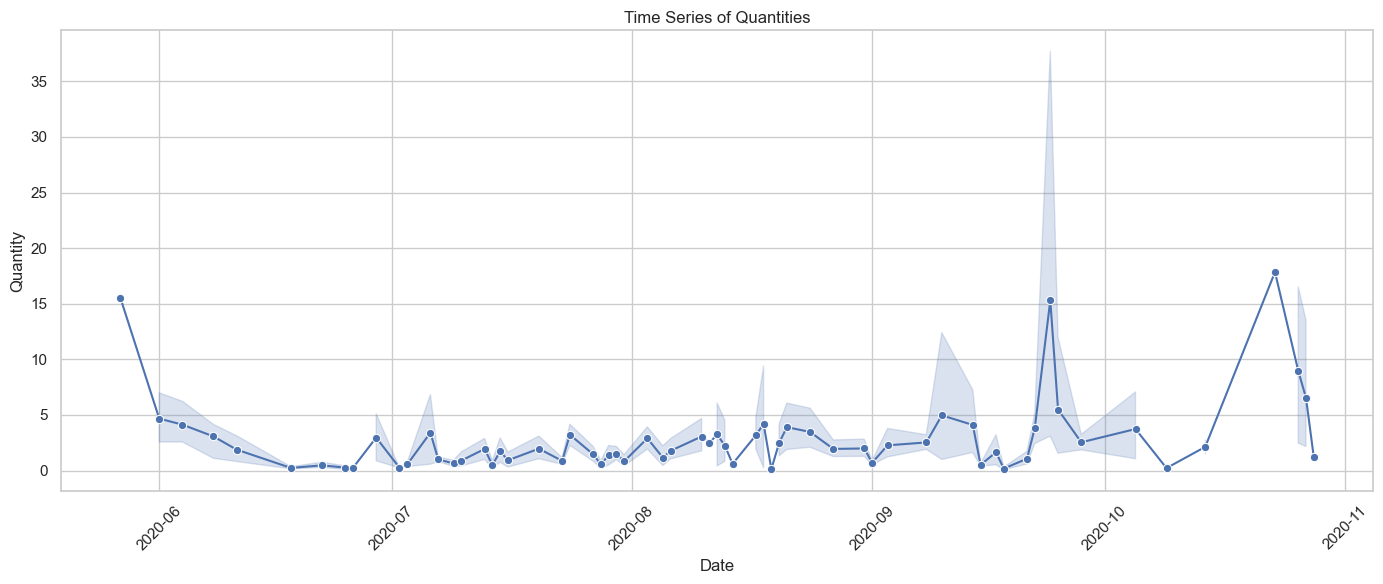

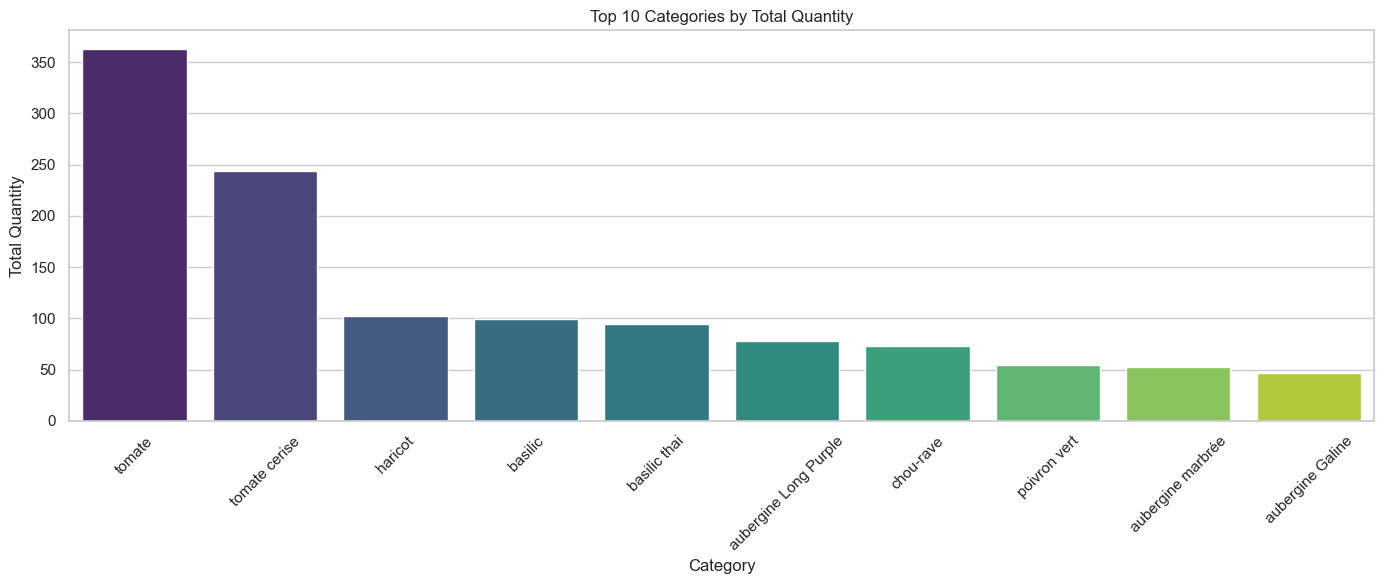

/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:36: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:36: UserWarning: Glyph 29916 (\N{CJK UNIFIED IDEOGRAPH-74DC}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:36: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:36: UserWarning: Glyph 33529 (\N{CJK UNIFIED IDEOGRAPH-82F9}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1639054343.py:36: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) Arial.
  plt.tight_layout()
/Users/user/anaconda3/lib/python3.11/site-packages

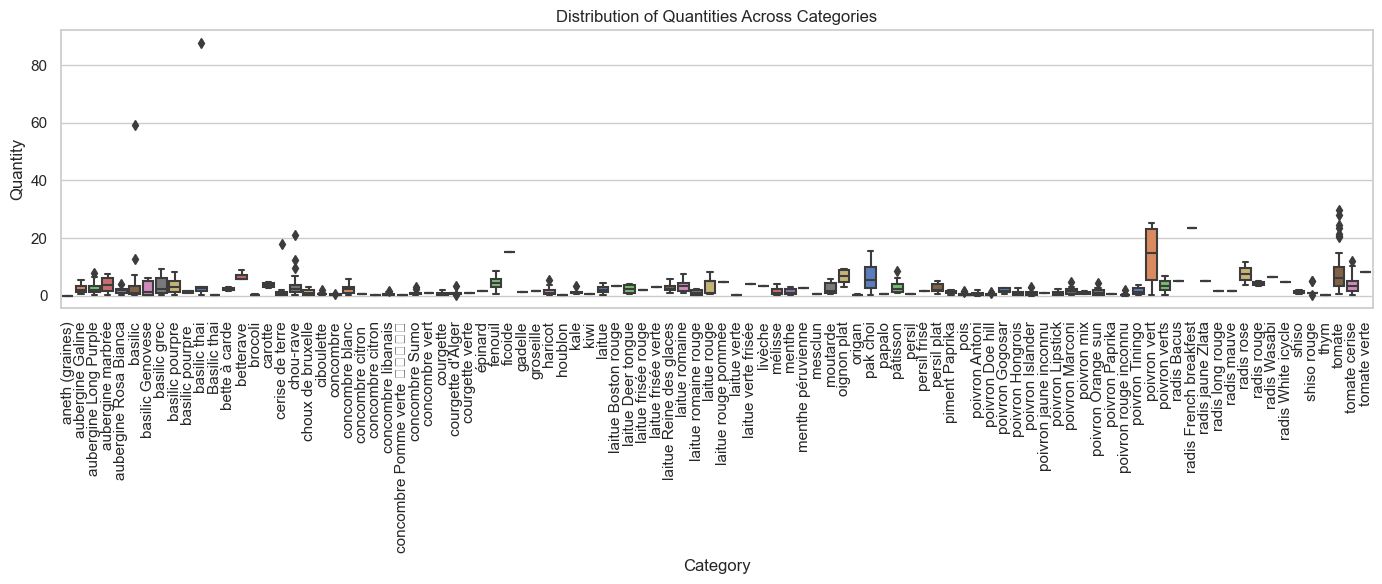

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization environment
sns.set(style="whitegrid")

# Creating a line graph for time series analysis
plt.figure(figsize=(14, 6))
data_cleaned['Récoltes '] = pd.to_datetime(data_cleaned['Récoltes '])
time_series_plot = sns.lineplot(data=data_cleaned, x='Récoltes ', y='Quantity', marker='o')
time_series_plot.set_title('Time Series of Quantities')
time_series_plot.set_xlabel('Date')
time_series_plot.set_ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a bar chart for categorical comparisons
plt.figure(figsize=(14, 6))
top_categories = data_cleaned.groupby('Palais des Congrès')['Quantity'].sum().nlargest(10)
bar_chart = sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
bar_chart.set_title('Top 10 Categories by Total Quantity')
bar_chart.set_xlabel('Category')
bar_chart.set_ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a boxplot to visualize distributions
plt.figure(figsize=(14, 6))
boxplot = sns.boxplot(data=data_cleaned, x='Palais des Congrès', y='Quantity', palette='muted')
boxplot.set_title('Distribution of Quantities Across Categories')
boxplot.set_xlabel('Category')
boxplot.set_ylabel('Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

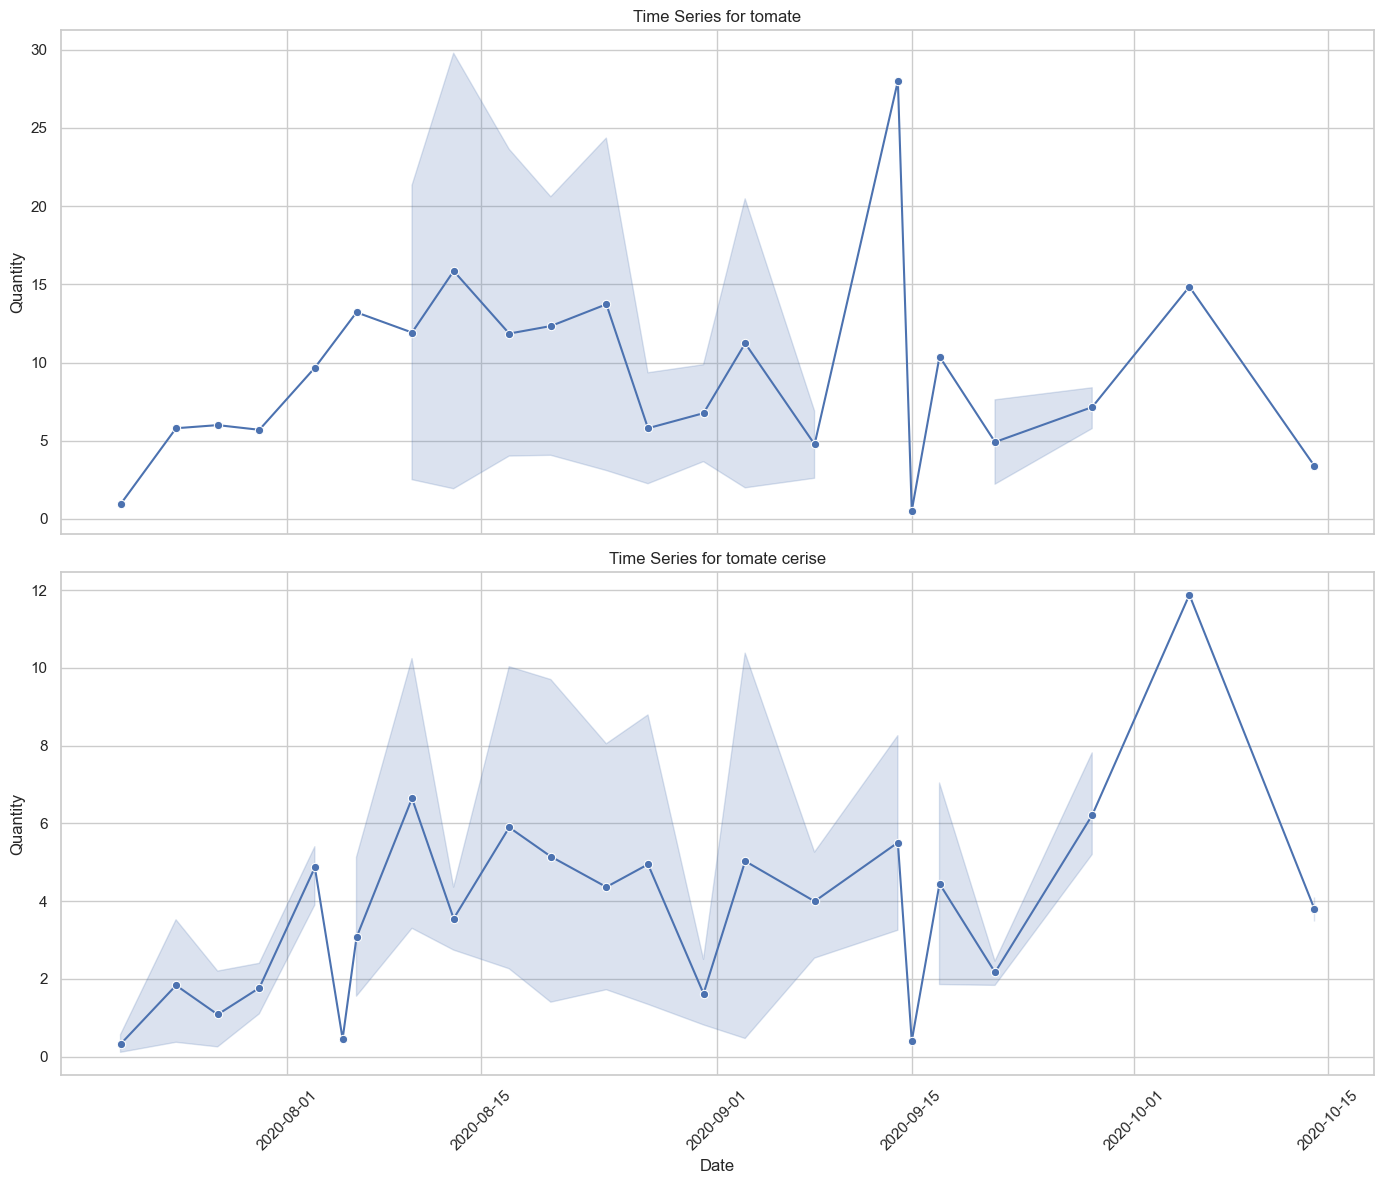

In [33]:
# We will plot line graphs for the significant categories excluding the aggregates with only one data point to make the plots meaningful
significant_categories = ['tomate', 'tomate cerise'] 

# Plotting individual line graphs for these significant categories
fig, axes = plt.subplots(len(significant_categories), 1, figsize=(14, 6 * len(significant_categories)), sharex=True)

for ax, category in zip(axes, significant_categories):
    category_data = data_cleaned[data_cleaned['Palais des Congrès'] == category]
    sns.lineplot(data=category_data, x='Récoltes ', y='Quantity', ax=ax, marker='o')
    ax.set_title(f'Time Series for {category}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Quantity')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [35]:
# Grouping the data by the 'section' column to see differences in measurements across classifications
grouped_by_section = data_cleaned.groupby('section')['Quantity'].agg(['sum', 'mean', 'std', 'count']).reset_index()

grouped_by_section


,section,sum,mean,std,count
0,-,2.300,2.300000,NaN,1
1,a,113.251,2.980289,2.914214,38
2,b,46.549,1.163725,3.481652,40
3,biotop,31.188,2.835273,1.823840,11
4,c,215.295,1.516162,2.300125,142
5,d,360.695,2.268522,2.147763,159
6,e,167.595,2.121456,3.629758,79
7,f,49.870,1.719655,1.465412,29
8,g,614.781,4.299168,5.683612,143
9,passerelle,57.946,1.869226,2.125411,31


Sections such as "g" and "vertical" have higher total quantities and show greater variability (as seen from the standard deviation).

In [36]:
# Filtering the data to show what kinds of 'Palais des Congrès' entries are in the 'section g' and 'vertical'
section_g_types = data_cleaned[data_cleaned['section'] == 'g']['Palais des Congrès'].unique()
vertical_types = data_cleaned[data_cleaned['section'] == 'vertical']['Palais des Congrès'].unique()

section_g_types, vertical_types


(array(['concombre', 'concombre blanc', 'concombre citron ',
        'concombre citron', 'concombre libanais', 'concombre Pomme verte',
        'concombre Sumo', 'concombre vert', 'épinard', 'haricot',
        'pak choi', 'pâtisson', 'pois', 'tomate', 'tomate cerise',
        'tomate verte'], dtype=object),
 array(['aneth (graines)', 'basilic', 'basilic Genovese', 'basilic grec',
        'basilic pourpre', 'basilic pourpre ', 'basilic thai',
        'Basilic thai', 'bette à carde', 'chou-rave', 'ciboulette',
        'fenouil', 'ficoide', 'haricot', 'laitue romaine', 'laitue verte',
        'livèche', 'mélisse', 'menthe', 'origan', 'persil', 'persil frisé',
        'persil plat', 'poivron Doe hill', 'poivron Hongrois',
        'poivron mix', 'poivron Orange sun', 'poivron rouge inconnu',
        'poivron verts', 'shiso', 'shiso rouge', 'thym'], dtype=object))

In [14]:
# Counting the number of unique 'Palais des Congrès' types in each section
types_count_per_section = data_cleaned.groupby('section')['Palais des Congrès'].nunique().reset_index()

types_count_per_section.rename(columns={'Palais des Congrès': 'Unique Types Count'}, inplace=True)
types_count_per_section


,section,Unique Types Count
0,-,1
1,a,8
2,b,8
3,biotop,7
4,c,15
5,d,25
6,e,22
7,f,7
8,g,16
9,passerelle,10


The "vertical" section contains the highest variety, with 32 unique types, suggesting a diverse range of items being classified or handled under this descriptor.

Sections "d" and "e" also have a relatively high number of unique types, indicating significant activity or diversity in these categories.

Other sections like "-", and "petits fruits" contain only one type, which might be specific to a single kind of item or event.

In [15]:
df = pd.read_excel('2020.xlsx', sheet_name='Valeurs$ production')

In [16]:
df.head()

,Unnamed: 0,Unnamed: 1,Prix détail,Unnamed: 3,Unnamed: 4,Prix semi-gros,Unnamed: 6,Unnamed: 7
0,Produit,Poids (kg),Prix,Unité,Prix total,Prix,Unité,Prix total
1,Aubergine,204.424,2.5,0.437,1169.473684,24,4.99,983.201603
2,Basilic,246.018,NaN,NaN,NaN,24,1.2,4920.36
3,Bette à carde,6.984,2.75,0.71,27.050704,34,17.04,13.935211
4,Betterave,20.18,3.75,1,75.675,2.5,1,50.45


In [17]:
columns_renamed = {
    "Unnamed: 0": "Produit",
    "Unnamed: 1": "Poids(kg)",
    "Prix détail": "Prix",
    "Unnamed: 3": "Unite",
    "Unnamed: 4": "Prix total",
    "Prix semi-gros": "Prix2",
    "Unnamed: 6": "Unite2",
    "Unnamed: 7": "Prix total2"
}

In [18]:
df_new = df.rename(columns=columns_renamed)

In [19]:
df_new.head()

,Produit,Poids(kg),Prix,Unite,Prix total,Prix2,Unite2,Prix total2
0,Produit,Poids (kg),Prix,Unité,Prix total,Prix,Unité,Prix total
1,Aubergine,204.424,2.5,0.437,1169.473684,24,4.99,983.201603
2,Basilic,246.018,NaN,NaN,NaN,24,1.2,4920.36
3,Bette à carde,6.984,2.75,0.71,27.050704,34,17.04,13.935211
4,Betterave,20.18,3.75,1,75.675,2.5,1,50.45


In [20]:
# Remove the first row by index
df_new = df_new.drop(df_new.index[0])

# Reset the index if you want to realign the index after dropping the row
df_new.reset_index(drop=True, inplace=True)


In [21]:
df_new.head()

,Produit,Poids(kg),Prix,Unite,Prix total,Prix2,Unite2,Prix total2
0,Aubergine,204.424,2.5,0.437,1169.473684,24,4.99,983.201603
1,Basilic,246.018,NaN,NaN,NaN,24,1.2,4920.36
2,Bette à carde,6.984,2.75,0.71,27.050704,34,17.04,13.935211
3,Betterave,20.18,3.75,1,75.675,2.5,1,50.45
4,Pak choï *,39.47,3,0.925,128.010811,36,15.88,89.478589


In [22]:
import numpy as np

# Convert 'Prix' to string, clean it to remove any currency symbols, and convert to float
df_new['Prix'] = df_new['Prix'].astype(str).str.replace('$', '').astype(float)

# Convert 'Unité' to string, extract the numeric part, and convert it to float
df_new['Unite'] = df_new['Unite'].astype(str).str.extract('(\d+\.?\d*)')[0].astype(float)

# Calculate the 'total' column only where 'Unité' is not NaN
df_new['total1'] = np.where(pd.notna(df_new['Unite']),
                           df_new['Poids(kg)'] * (df_new['Prix'] / df_new['Unite']),
                           np.nan)

# Print the updated DataFrame to check the new 'total' column
print(df_new[['Produit', 'Poids(kg)', 'Prix', 'Unite', 'total1']].head())

         Produit Poids(kg)  Prix  Unite       total1
0      Aubergine   204.424  2.50  0.437  1169.473684
1        Basilic   246.018   NaN    NaN          NaN
2  Bette à carde     6.984  2.75  0.710    27.050704
3      Betterave     20.18  3.75  1.000       75.675
4     Pak choï *     39.47  3.00  0.925   128.010811


In [23]:
# Convert 'Prix' to string, clean it to remove any currency symbols, and convert to float
df_new['Prix2'] = df_new['Prix2'].astype(str).str.replace('$', '').astype(float)

# Convert 'Unité' to string, extract the numeric part, and convert it to float
df_new['Unite2'] = df_new['Unite2'].astype(str).str.extract('(\d+\.?\d*)')[0].astype(float)

# Calculate the 'total' column only where 'Unité' is not NaN
df_new['total2'] = np.where(pd.notna(df_new['Unite2']),
                           df_new['Poids(kg)'] * (df_new['Prix2'] / df_new['Unite2']),
                           np.nan)

# Print the updated DataFrame to check the new 'total' column
print(df_new[['Produit', 'Poids(kg)', 'Prix2', 'Unite2', 'total2']].head())

         Produit Poids(kg)  Prix2  Unite2      total2
0      Aubergine   204.424   24.0    4.99  983.201603
1        Basilic   246.018   24.0    1.20     4920.36
2  Bette à carde     6.984   34.0   17.04   13.935211
3      Betterave     20.18    2.5    1.00       50.45
4     Pak choï *     39.47   36.0   15.88   89.478589


In [24]:
df_new.head()

,Produit,Poids(kg),Prix,Unite,Prix total,Prix2,Unite2,Prix total2,total1,total2
0,Aubergine,204.424,2.50,0.437,1169.473684,24.0,4.99,983.201603,1169.473684,983.201603
1,Basilic,246.018,NaN,NaN,NaN,24.0,1.20,4920.36,NaN,4920.36
2,Bette à carde,6.984,2.75,0.710,27.050704,34.0,17.04,13.935211,27.050704,13.935211
3,Betterave,20.18,3.75,1.000,75.675,2.5,1.00,50.45,75.675,50.45
4,Pak choï *,39.47,3.00,0.925,128.010811,36.0,15.88,89.478589,128.010811,89.478589


In [25]:
# Adjust the table to include the variety name as a column
max_poids_by_variety_detailed = data_cleaned.groupby('Palais des Congrès').apply(
    lambda x: x.loc[x['Quantity'].idxmax(), ['Récoltes ', 'Quantity']]
).reset_index()
max_poids_by_variety_detailed.columns = ['Palais des Congrès', 'Récoltes', 'Quantity']
max_poids_by_variety_detailed

/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_43709/1968480689.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_poids_by_variety_detailed = data_cleaned.groupby('Palais des Congrès').apply(


,Palais des Congrès,Récoltes,Quantity
0,Basilic thai,2020-07-15,0.220
1,aneth (graines),2020-09-18,0.010
2,aubergine Galine,2020-08-03,5.400
3,aubergine Long Purple,2020-08-03,7.800
4,aubergine Rosa Bianca,2020-08-24,3.952
...,...,...,...
93,thym,2020-08-05,0.180
94,tomate,2020-08-13,29.780
95,tomate cerise,2020-10-05,11.880
96,tomate verte,2020-09-28,8.238


In [26]:
def check_variety(variety_name):
    return max_poids_by_variety_detailed[max_poids_by_variety_detailed['Palais des Congrès'] == variety_name]

# Example usage
print(check_variety('Basilic thai'))

  Palais des Congrès   Récoltes  Quantity
0       Basilic thai 2020-07-15      0.22
